In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [6]:
# loading data
data = np.loadtxt('data1.txt',delimiter=',')
print(data.shape)
num_feature = data.shape[1] - 1
data = data.astype('float32')


OSError: data1.txt not found.

In [ ]:
# data normalization
data_norm = data.copy()
maximum = np.max(data_norm,axis=0,keepdims=True)
print(maximum)
minimun = np.min(data_norm,axis=0,keepdims=True)
data_norm = (data_norm - minimun)/(maximum - minimun)
print(data_norm)

In [96]:
# train val split
data_train, data_test = train_test_split(data_norm, test_size=0.3, random_state=42)
X_train = data_train[:, :2]
X_train = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)
y_train = data_train[:, 2]
X_test = data_test[:, :2]
X_test = np.concatenate((X_test, np.ones((X_test.shape[0],1))), axis=1)
y_test = data_test[:, 2]

In [110]:
# model init
w = np.random.rand(num_feature+1,1)

# gradient descent
def L2_loss(y_pred,y):
    return np.mean(np.square(y_pred-y))

iterations = 10000
lr = 0.1


In [111]:
log = []
for i in range(iterations):
    y_pred = np.matmul(X_train, w)
    term = lr*np.mean((y_pred-y_train.reshape(-1,1))*X_train, axis=0).reshape(-1,1)
    w -= term
    loss = L2_loss(y_pred,y_train)
    print('iter:{},loss:{}'.format(i,loss))
    log.append([i,loss])

iter:0,loss:0.16132677888914249
iter:1,loss:0.13861489771909413
iter:2,loss:0.12173991650142649
iter:3,loss:0.10918342128687189
iter:4,loss:0.09982503566949558
iter:5,loss:0.09283763774266576
iter:6,loss:0.08761022454908664
iter:7,loss:0.08369112002300225
iter:8,loss:0.08074615331385827
iter:9,loss:0.07852785463511341
iter:10,loss:0.07685276046712054
iter:11,loss:0.07558468839640457
iter:12,loss:0.07462240715483937
iter:13,loss:0.0738905432647156
iter:14,loss:0.07333287161961341
iter:15,loss:0.07290736240305151
iter:16,loss:0.07258252234569275
iter:17,loss:0.07233469017168667
iter:18,loss:0.07214603575112963
iter:19,loss:0.07200307846561019
iter:20,loss:0.07189558886479619
iter:21,loss:0.07181577344684488
iter:22,loss:0.07175766871996518
iter:23,loss:0.07171669008750747
iter:24,loss:0.07168929537689409
iter:25,loss:0.07167273335164057
iter:26,loss:0.07166485529753477
iter:27,loss:0.07166397348856962
iter:28,loss:0.07166875455253394
iter:29,loss:0.07167813886550102
iter:30,loss:0.071691

In [56]:
# normal eqution
term = np.matmul(X_train.T, X_train)
term_inv = np.linalg.inv(term)
w = np.matmul(np.matmul(term_inv,X_train.T),y_train.reshape(-1,1))
print(w)

[[  131.12253589]
 [-2825.22573808]
 [69599.05822336]]


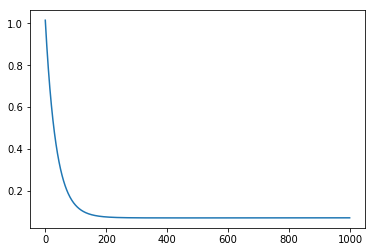

In [106]:
# loss curve visualization
log = np.array(log)
plt.plot(log[:,0],log[:,1])

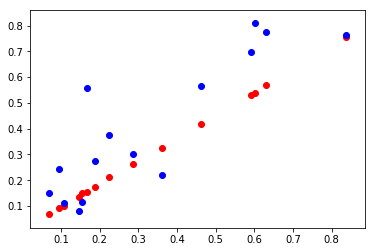

In [112]:
# visualization
y_pred = np.matmul(X_test, w)
plt.scatter(X_test[:,0],y_pred,c='r')
plt.scatter(X_test[:,0],y_test,c='b')

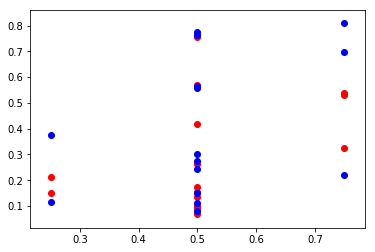

In [113]:
plt.scatter(X_test[:,1],y_pred,c='r')
plt.scatter(X_test[:,1],y_test,c='b')